## Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### METADATA
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.

- Date: The date of observation

- Location: The common name of the location of the weather station

- MinTemp: minimum temperature in degrees celsius

- MaxTemp: maximum temperature in degrees celsius

- Rainfall: amount of rainfall recorded for the day in mm

- Evaporation: evaporation (mm) in the 24 hours to 9am

- Sunshine: number of hours of bright sunshine in the day.

- WindGustDir: direction of the strongest wind gust in the 24 hours to midnight

- WindGustSpeed: speed (km/h) of the strongest wind gust in the 24 hours to midnight

- WindDir9am: direction of the wind at 9am

- WindDir3pm: direction of the wind at 3pm

- WindSpeed9am: wind speed (km/hr) averaged over 10 minutes prior to 9am

- WindSpeed3pm: wind speed (km/hr) averaged over 10 minutes prior to 3pm

- Humidity9am: humidity (percent) at 9am

- Humidity3pm: humidity (percent) at 3pm

- Pressure9am: atmospheric pressure (hpa) reduced to mean sea level at 9am

- Pressure3pm: atmospheric pressure (hpa) reduced to mean sea level at 3pm

- Cloud9am: fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

- Cloud3pm: fraction of sky obscured by cloud (in "oktas": eighths) at 3pm.

- Temp9amTemperature: (degrees C) at 9am

- Temp3pmTemperature: (degrees C) at 3pm

- RainToday Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

- RainTomorrow: target variable. Did it rain tomorrow?

#### Q1

#### Removing attributes not useful to predict rain

we are removing the date and location information from the dataset as they contain information that can be explained using other variables.
location is removed as we are not dividing it into individual subsets to calculate according to location
date is removed as on that date there could be different meterological conditions that may have infuluenced rainfall

In [3]:
df = df.drop(['Date','Location'], axis=1)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112413,11.5,30.9,0.0,NaN,NaN,SE,39.0,ENE,SSE,11.0,...,51.0,39.0,NaN,NaN,NaN,NaN,21.6,28.3,No,No
112414,15.6,30.8,0.0,NaN,NaN,SSE,44.0,ESE,SSE,9.0,...,47.0,47.0,NaN,NaN,NaN,NaN,21.6,27.4,No,No
112415,16.7,31.6,0.0,NaN,NaN,S,39.0,ENE,E,19.0,...,55.0,30.0,NaN,NaN,NaN,NaN,22.8,30.6,No,No
112416,13.9,28.4,0.0,NaN,NaN,WSW,31.0,E,WSW,13.0,...,65.0,53.0,NaN,NaN,NaN,NaN,22.0,26.5,No,No


#### removing rows with atleast one missing value

In [4]:
df.isnull().sum()

MinTemp           1294
MaxTemp           1101
Rainfall          2649
Evaporation      46724
Sunshine         54877
WindGustDir       9668
WindGustSpeed     9643
WindDir9am        8868
WindDir3pm        3884
WindSpeed9am      1597
WindSpeed3pm      2881
Humidity9am       2173
Humidity3pm       3272
Pressure9am      10757
Pressure3pm      10714
Cloud9am         41548
Cloud3pm         44298
Temp9am           1620
Temp3pm           2774
RainToday         2650
RainTomorrow      2652
dtype: int64

In [5]:
df = df.dropna(axis = 0)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108178,6.4,19.7,0.0,2.8,9.4,N,37.0,NE,N,13.0,...,79.0,32.0,1019.4,1016.6,2.0,3.0,11.3,19.0,No,No
108346,12.0,22.9,0.0,12.8,0.0,WSW,83.0,SW,SW,41.0,...,56.0,46.0,1014.7,1014.2,5.0,8.0,14.7,20.6,No,No
108351,22.1,33.2,0.0,17.4,0.0,SE,43.0,SSE,SE,26.0,...,44.0,25.0,1014.5,1013.1,8.0,4.0,23.6,32.1,No,No
108352,17.9,35.8,0.0,14.8,0.0,SSE,41.0,SSE,N,20.0,...,52.0,19.0,1015.7,1012.7,6.0,1.0,21.2,33.8,No,No


#### transforming the yes = 1 and no = 0 therefore making it binary numeric

In [6]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
df.head()

D:\Ananconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


#### Q2

In [7]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = "+".join(df.columns - ['RainTomorrow'])
vif = pd.DataFrame()
y,X = dmatrices('RainTomorrow ~'+features,data = df,return_type = 'dataframe')
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ]
vif['variable'] = X.columns
vif

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43258 entries, 6049 to 108542
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        43258 non-null  float64
 1   MaxTemp        43258 non-null  float64
 2   Rainfall       43258 non-null  float64
 3   Evaporation    43258 non-null  float64
 4   Sunshine       43258 non-null  float64
 5   WindGustDir    43258 non-null  object 
 6   WindGustSpeed  43258 non-null  float64
 7   WindDir9am     43258 non-null  object 
 8   WindDir3pm     43258 non-null  object 
 9   WindSpeed9am   43258 non-null  float64
 10  WindSpeed3pm   43258 non-null  float64
 11  Humidity9am    43258 non-null  float64
 12  Humidity3pm    43258 non-null  float64
 13  Pressure9am    43258 non-null  float64
 14  Pressure3pm    43258 non-null  float64
 15  Cloud9am       43258 non-null  float64
 16  Cloud3pm       43258 non-null  float64
 17  Temp9am        43258 non-null  float64
 18  Te

In [9]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]
Y = df['RainTomorrow']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=45)

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

D:\Ananconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.841886269070735

In [16]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
vif = pd.DataFrame()
vif['variable'] = X.columns
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)

         variable            VIF
0         MinTemp      57.476447
1         MaxTemp     576.379281
2        Rainfall       1.585703
3     Evaporation       6.516922
4        Sunshine      15.945564
5   WindGustSpeed      28.367193
6    WindSpeed9am       8.543129
7    WindSpeed3pm      14.416368
8     Humidity9am      66.714293
9     Humidity3pm      49.528280
10    Pressure9am  422888.803367
11    Pressure3pm  421391.902704
12       Cloud9am       7.542590
13       Cloud3pm       8.786341
14        Temp9am     199.646964
15        Temp3pm     644.930955
16      RainToday       2.205320


#### Q3

In [17]:
df['TempDiff'] = df['Temp3pm'] - df['Temp9am']
df['HumidityDiff'] = df['Humidity3pm'] - df['Humidity9am']
df['CloudDiff'] = df['Cloud3pm'] - df['Cloud9am']
df['WindSpeedDiff'] = df['WindSpeed3pm'] - df['WindSpeed9am']
df['PressureDiff'] = df['Pressure3pm'] - df['Pressure9am']
df['DayTempDiff'] = df['MaxTemp'] - df['MinTemp']
df = df.drop(['MaxTemp','MinTemp','Temp3pm', 'Temp9am', 'Humidity3pm', 'Humidity9am', 'Cloud3pm', 'Cloud9am', 'WindSpeed3pm', 'WindSpeed9am', 'Pressure3pm', 'Pressure9am'], axis=1)

df

<ipython-input-17-b8949a8fc2c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TempDiff'] = df['Temp3pm'] - df['Temp9am']
<ipython-input-17-b8949a8fc2c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HumidityDiff'] = df['Humidity3pm'] - df['Humidity9am']
<ipython-input-17-b8949a8fc2c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,TempDiff,HumidityDiff,CloudDiff,WindSpeedDiff,PressureDiff,DayTempDiff
6049,0.0,12.0,12.3,SSW,48.0,ENE,SW,0,0,6.8,-7.0,3.0,14.0,-1.9,17.3
6050,0.0,14.8,13.0,S,37.0,SSE,SSE,0,0,6.7,-22.0,0.0,0.0,-0.8,10.5
6052,0.0,10.8,10.6,NNE,46.0,NNE,NNW,0,0,6.2,-20.0,5.0,-15.0,-3.1,18.2
6053,0.0,11.4,12.2,WNW,31.0,WNW,WSW,0,0,6.5,-15.0,4.0,0.0,-3.6,16.5
6054,0.0,11.2,8.4,WNW,35.0,NW,WNW,0,0,4.0,-4.0,5.0,-4.0,-3.3,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108178,0.0,2.8,9.4,N,37.0,NE,N,0,0,7.7,-47.0,1.0,7.0,-2.8,13.3
108346,0.0,12.8,0.0,WSW,83.0,SW,SW,0,0,5.9,-10.0,3.0,0.0,-0.5,10.9
108351,0.0,17.4,0.0,SE,43.0,SSE,SE,0,0,8.5,-19.0,-4.0,-6.0,-1.4,11.1
108352,0.0,14.8,0.0,SSE,41.0,SSE,N,0,0,12.6,-33.0,-5.0,-3.0,-3.0,17.9


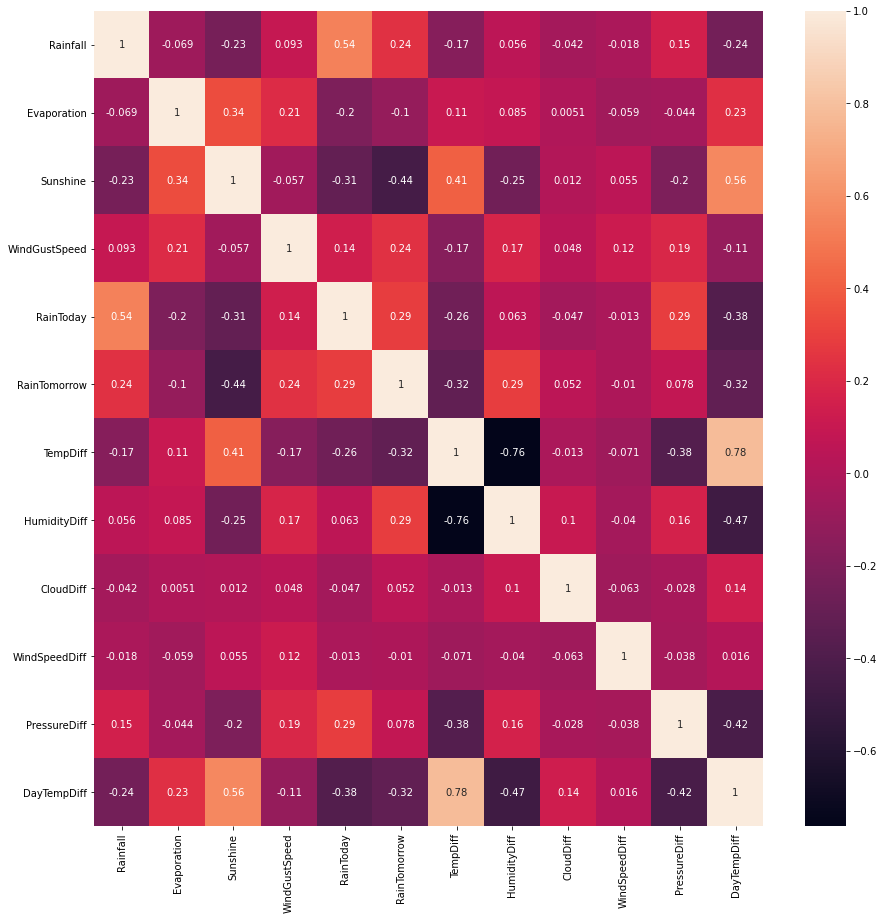

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

#### calculating VIF again

In [19]:
X = df[['DayTempDiff', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed','WindSpeedDiff','HumidityDiff', 'PressureDiff', 'CloudDiff', 'TempDiff','RainToday']]
Y = df['RainTomorrow']
vif = pd.DataFrame()
vif['variable'] = X.columns
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)

         variable        VIF
0     DayTempDiff  19.807170
1        Rainfall   1.555703
2     Evaporation   4.009549
3        Sunshine   7.586819
4   WindGustSpeed   6.553986
5   WindSpeedDiff   1.381010
6    HumidityDiff   5.957153
7    PressureDiff   3.064527
8       CloudDiff   1.079906
9        TempDiff  14.203094
10      RainToday   2.032199


#### removing features with vif greater than 5

In [20]:
df = df.drop(['DayTempDiff','Sunshine','WindGustSpeed','HumidityDiff','TempDiff'],axis = 1)

In [21]:
df

,Rainfall,Evaporation,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,CloudDiff,WindSpeedDiff,PressureDiff
6049,0.0,12.0,SSW,ENE,SW,0,0,3.0,14.0,-1.9
6050,0.0,14.8,S,SSE,SSE,0,0,0.0,0.0,-0.8
6052,0.0,10.8,NNE,NNE,NNW,0,0,5.0,-15.0,-3.1
6053,0.0,11.4,WNW,WNW,WSW,0,0,4.0,0.0,-3.6
6054,0.0,11.2,WNW,NW,WNW,0,0,5.0,-4.0,-3.3
...,...,...,...,...,...,...,...,...,...,...
108178,0.0,2.8,N,NE,N,0,0,1.0,7.0,-2.8
108346,0.0,12.8,WSW,SW,SW,0,0,3.0,0.0,-0.5
108351,0.0,17.4,SE,SSE,SE,0,0,-4.0,-6.0,-1.4
108352,0.0,14.8,SSE,SSE,N,0,0,-5.0,-3.0,-3.0


#### Q5

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=45)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

D:\Ananconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8289412852519649

#### the model score after VIF calulation and handling attributes is 0.8289412852519649 whereas before it was 0.841886269070735 which is kind of a suprise

This shows how removing multicollinearity doesn't really significantly improve the predictive power of the model.